In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
!pip install kagglehub

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alamshihab075/mental-health-dataset")

print("Path to dataset files:", path)

/home/cloud/anaconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/cloud/.cache/kagglehub/datasets/alamshihab075/mental-health-dataset/versions/2


In [5]:
df = pd.read_csv("/home/cloud/.cache/kagglehub/datasets/alamshihab075/mental-health-dataset/versions/2/Mental Health dataset1.csv")

In [6]:
df = df.dropna(subset=['CareOptions']).fillna("Missing")

In [7]:
X = df.drop(columns=['CareOptions']).astype(str)
y = df['CareOptions'].astype(str)

In [8]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,C=0.5,penalty='l2',solver='lbfgs',class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10,min_samples_leaf=5,class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=300,max_depth=15,min_samples_leaf=3,class_weight='balanced'),
    "XGBoost": XGBClassifier(n_estimators=300,max_depth=6,learning_rate=0.05,subsample=0.8,colsample_bytree=0.8)
}

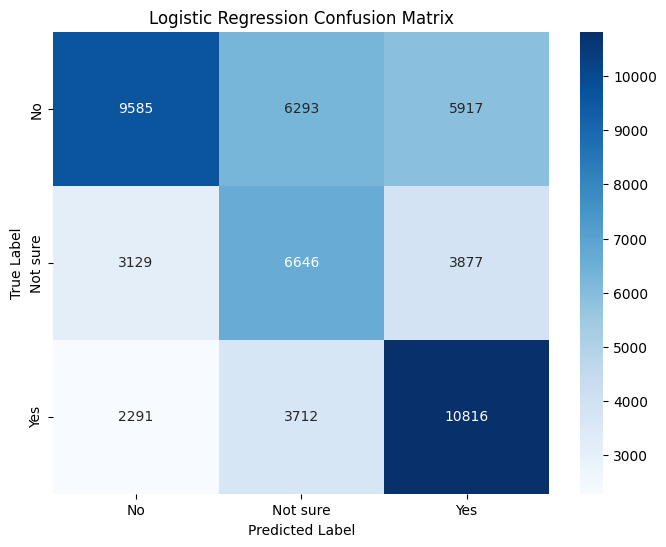

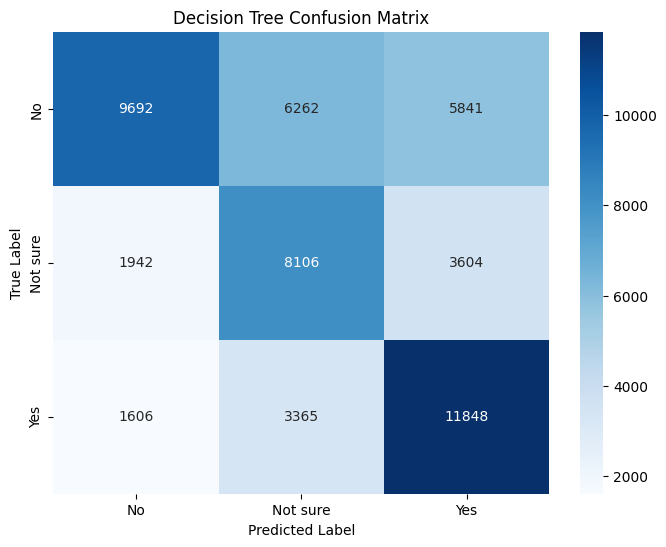

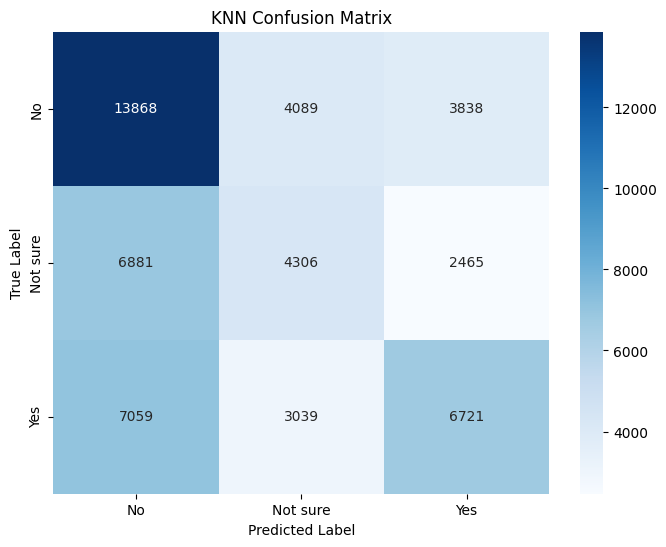

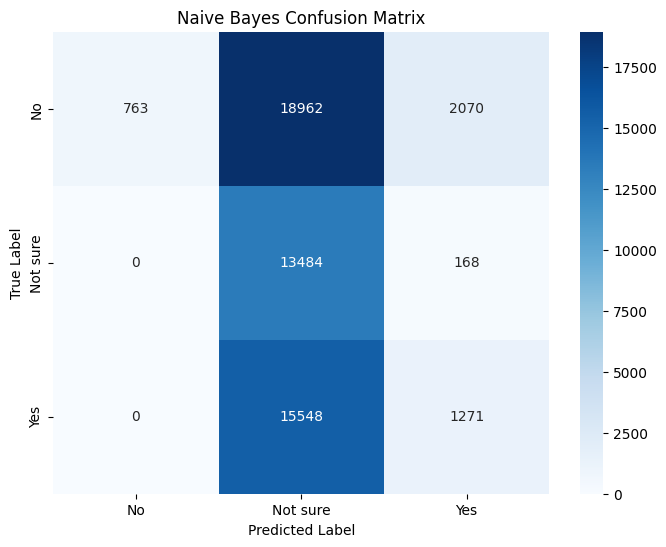

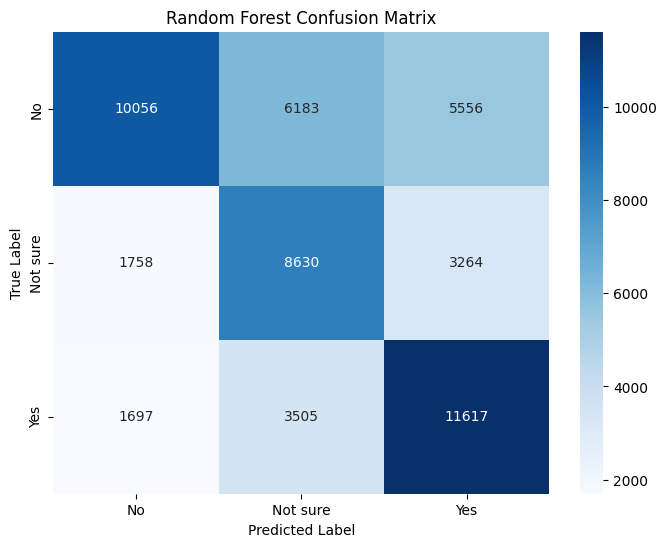

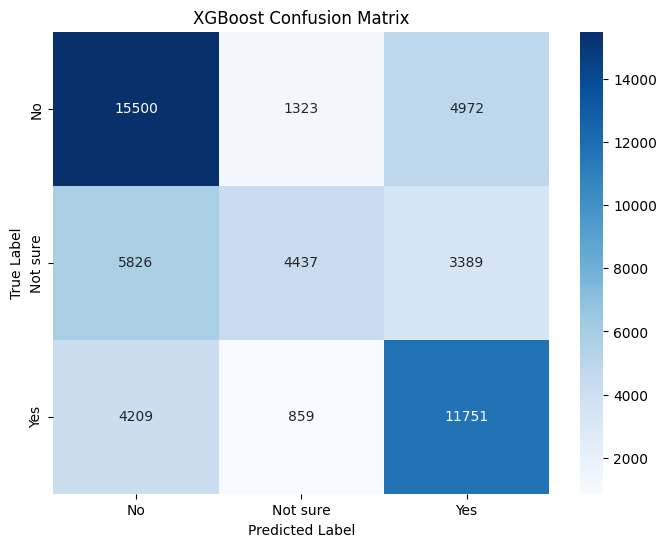

In [11]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob, multi_class='ovr'),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1": f1_score(y_test, y_pred, average='macro'),
        "MCC": matthews_corrcoef(y_test, y_pred)
    })

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)   
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(name + " Confusion Matrix")
    plt.show()

In [12]:
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy       AUC  Precision    Recall        F1  \
0  Logistic Regression  0.517487  0.701264   0.520905  0.523226  0.512503   
1        Decision Tree  0.567214  0.756134   0.581855  0.580963  0.563858   
2                  KNN  0.476313  0.653783   0.463783  0.450437  0.450961   
3          Naive Bayes  0.296904  0.653832   0.547721  0.366090  0.210054   
4        Random Forest  0.579784  0.775206   0.594611  0.594746  0.577720   
5              XGBoost  0.606283  0.793894   0.620544  0.578285  0.576373   

        MCC  
0  0.285439  
1  0.369511  
2  0.185843  
3  0.093074  
4  0.388198  
5  0.392964  
